# Evaluation Project 8 Customer Churn Analysis

<b>Importing require library for performing EDA, Data Wrangling and data cleaning<b>

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns  
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Importing Customer Churn Analysis dataset Csv
df=pd.read_csv('Telecom_customer_churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
print('No. of Rows:', df.shape[0])

No. of Rows: 7043


In [5]:
print('No. of Columns:', df.shape[1])

No. of Columns: 21


In [6]:
pd.set_option('display.max_columns',None) # # This will enable us to see truncated columns
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [11]:
df.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5967,5167-GBFRE,Male,1,No,No,4,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),25.2,102.5,Yes


In [12]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<b>going to Group Variable into Numerical and Categorical variables list in order to simplify further analysis. Next thing is droping CustomerID Column.<b>

In [14]:
df.drop(['customerID'],axis=1,inplace=True)

In [34]:
df['SeniorCitizen']= df['SeniorCitizen'].astype(object)

In [35]:
# spliting into Numerical & Categorical 
Categorical = [ 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod','SeniorCitizen', 'Churn']
Numerical = ['tenure','MonthlyCharges','TotalCharges']

# Statistical Analysis
<b>Before Going for Statistical exploration of data, first check integrity of data & Missing value<b>



## Data Integrity Check
<b>Since dataset is large, Let check for any entry which is repeated or duplicated in dataset.<b>

In [36]:
df.duplicated().sum() 

0

<b>We can see that 22 duplicate entry in dataset. Let drop duplicated entry from dataset.<b>

In [37]:
df.drop_duplicates(keep='last',inplace= True)

In [38]:
df.shape

(7021, 20)

<b> check for any whitespaces, NA,'-' in dataset<b>

In [39]:
df.isin([' ','NA','-']).sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<b>There is possibility of whitespaces in TotalCharges column.<b>

In [40]:
df['TotalCharges'].isin([' ']).sum().any()

False

In [41]:
# Replaceing Whitespaces with null values
df['TotalCharges']= df['TotalCharges'].replace(' ',np.nan)

In [42]:
# Converting object datatype into float
df['TotalCharges']= df['TotalCharges'].astype(float)

## missing values

In [43]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                  Missing Values  % Missing data
gender                         0             0.0
SeniorCitizen                  0             0.0
TotalCharges                   0             0.0
MonthlyCharges                 0             0.0
PaymentMethod                  0             0.0
PaperlessBilling               0             0.0
Contract                       0             0.0
StreamingMovies                0             0.0
StreamingTV                    0             0.0
TechSupport                    0             0.0
DeviceProtection               0             0.0
OnlineBackup                   0             0.0
OnlineSecurity                 0             0.0
InternetService                0             0.0
MultipleLines                  0             0.0
PhoneService                   0             0.0
tenure                         0             0.0
Dependents                     0             0.0
Partner                        0             0.0
Churn               

<b> impute missing value in TotalCharges either with mean and median. I can decide imputation method after checking distribution and Outliers in data<b>

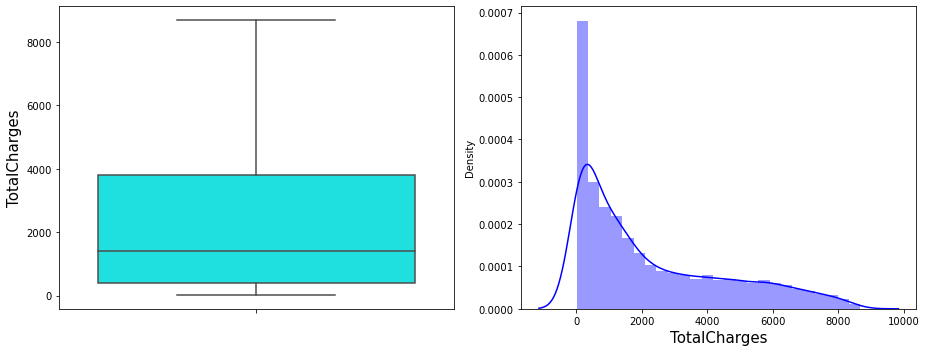

In [44]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.boxplot(y='TotalCharges', data=df,color='cyan')
plt.ylabel('TotalCharges',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['TotalCharges'], color='b')
plt.xlabel('TotalCharges',fontsize=15)
plt.tight_layout()
plt.show()

In [45]:
print("Mean of TotalCharges:",df['TotalCharges'].mean())
print("Median of TotalCharges:",df['TotalCharges'].median())

Mean of TotalCharges: 2290.3533880171217
Median of TotalCharges: 1410.25


<b>Imputation of Missing value in TotalCharges with Mean<b>

In [46]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

## Null values after Imputation

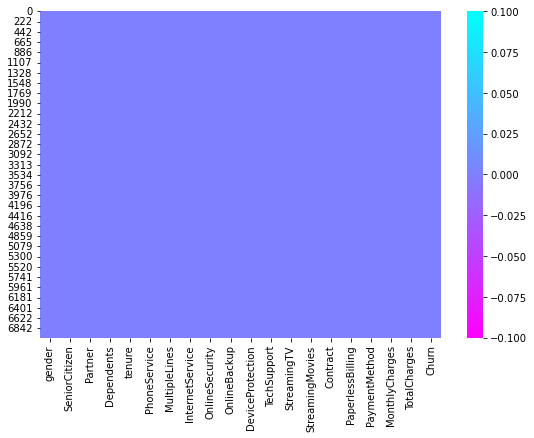

In [47]:
plt.figure(figsize=(9,6))
sns.heatmap(df.isnull(),cmap="cool_r")
plt.show()

# Statistical Matrix

In [48]:
df.describe

<bound method NDFrame.describe of       gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female             0     Yes         No       1           No   
1       Male             0      No         No      34          Yes   
2       Male             0      No         No       2          Yes   
3       Male             0      No         No      45           No   
4     Female             0      No         No       2          Yes   
...      ...           ...     ...        ...     ...          ...   
7038    Male             0     Yes        Yes      24          Yes   
7039  Female             0     Yes        Yes      72          Yes   
7040  Female             0     Yes        Yes      11           No   
7041    Male             1     Yes         No       4          Yes   
7042    Male             0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No  

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7021.0,32.469449,24.534965,0.00,9.00,29.00,55.0,72.00
MonthlyCharges,7021.0,64.851894,30.069001,18.25,35.75,70.40,89.9,118.75
TotalCharges,7021.0,2290.353388,2265.044136,18.80,411.15,1410.25,3801.7,8684.80


In [50]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
tenure,7021.000000,32.469449,24.534965,0.000000,9.000000,29.000000,55.000000,72.000000
MonthlyCharges,7021.000000,64.851894,30.069001,18.250000,35.750000,70.400000,89.900000,118.750000
TotalCharges,7021.000000,2290.353388,2265.044136,18.800000,411.150000,1410.250000,3801.700000,8684.800000


In [51]:
df[Categorical].describe().T

,count,unique,top,freq
gender,7021,2,Male,3541
Partner,7021,2,No,3619
Dependents,7021,2,No,4911
PhoneService,7021,2,Yes,6339
MultipleLines,7021,3,No,3368
InternetService,7021,3,Fiber optic,3090
OnlineSecurity,7021,3,No,3490
OnlineBackup,7021,3,No,3080
DeviceProtection,7021,3,No,3087
TechSupport,7021,3,No,3465


<b>Start with Enlisting Value counts & Sub-categories of different categorial features available<b>

In [52]:
for i in Categorical:
    print(i)
    print(df[i].value_counts())
    print("*"*100)

gender
Male      3541
Female    3480
Name: gender, dtype: int64
****************************************************************************************************
Partner
No     3619
Yes    3402
Name: Partner, dtype: int64
****************************************************************************************************
Dependents
No     4911
Yes    2110
Name: Dependents, dtype: int64
****************************************************************************************************
PhoneService
Yes    6339
No      682
Name: PhoneService, dtype: int64
****************************************************************************************************
MultipleLines
No                  3368
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
****************************************************************************************************
InternetService
Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64


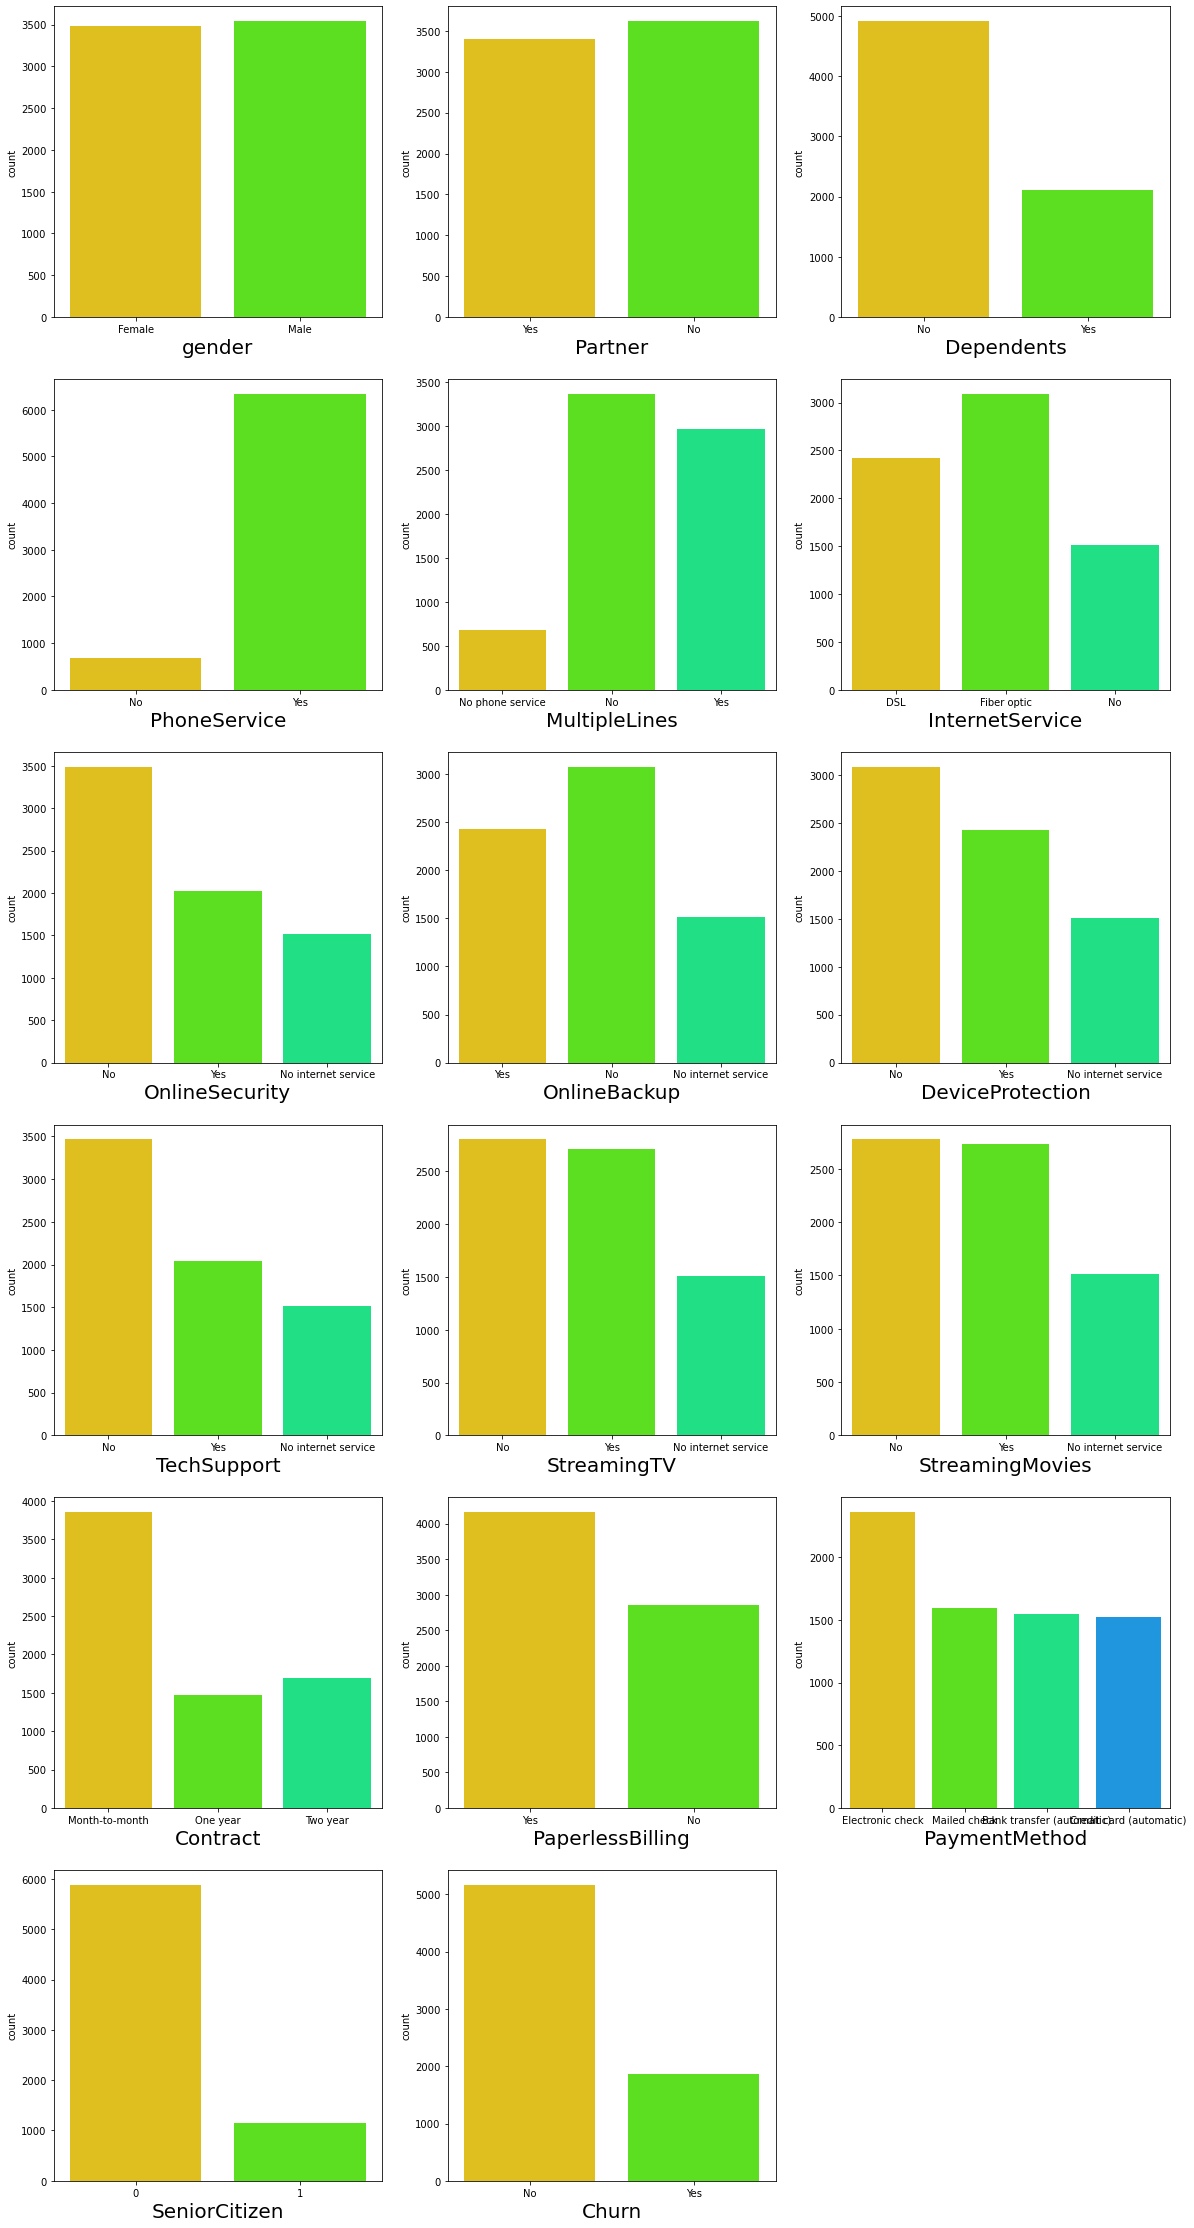

In [53]:
sns.set_palette('hsv')
plt.figure(figsize=(20,40), facecolor='white')
plotnumber =1
for i in Categorical:
    if plotnumber <=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

# Target Variable Churn

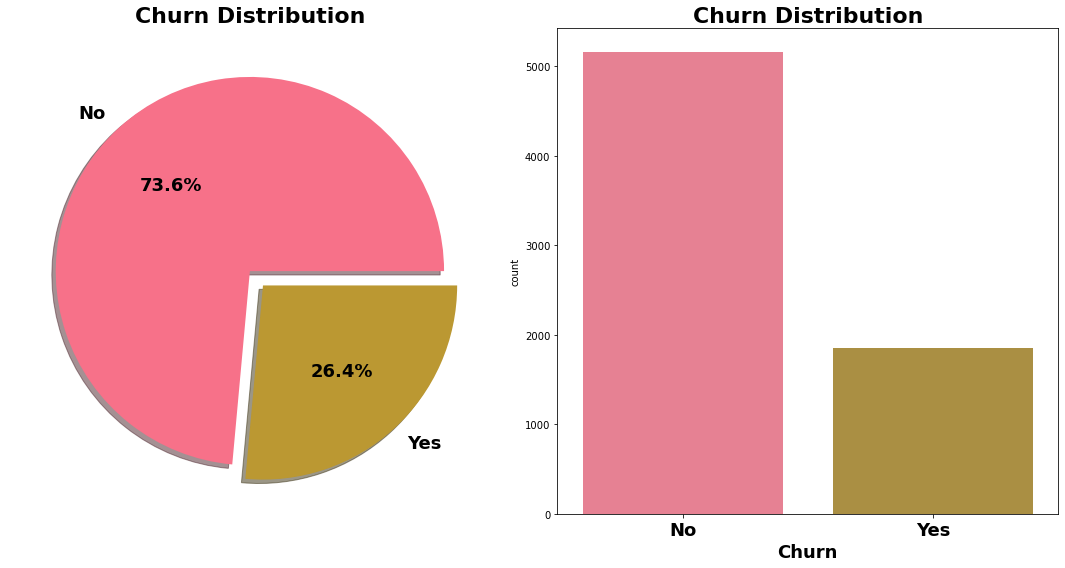

In [54]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(15,8))
df['Churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Churn Distribution', fontsize=22,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Churn',data=df,ax=ax[1])
ax[1].set_title('Churn Distribution',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Churn",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

<b>Gender vs Churn : Can there exist any trend between gender & churn or any impact of gender on Churn?<b>

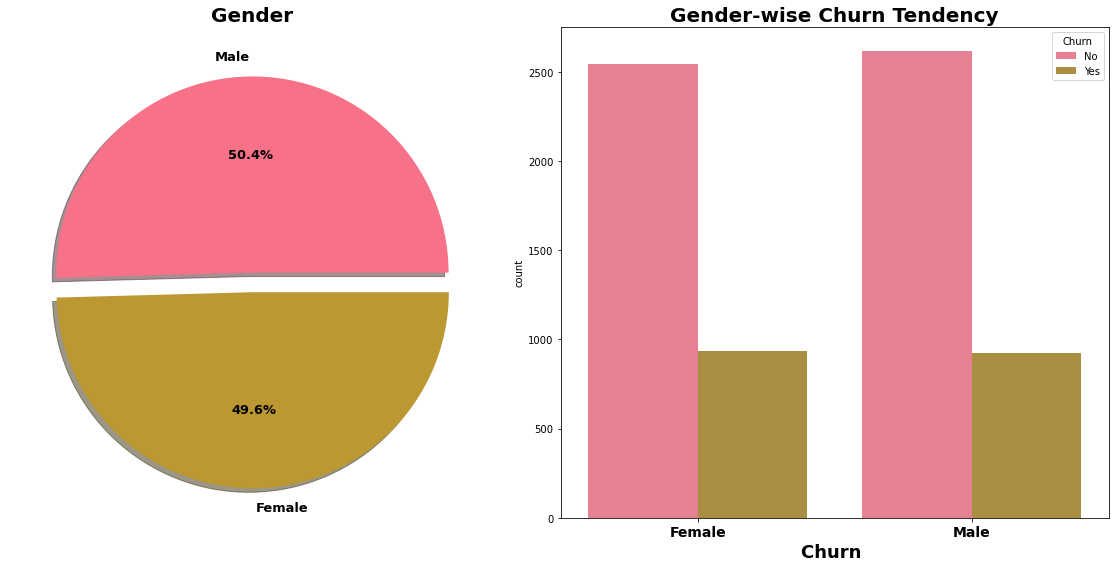

In [55]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,8))
df['gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Gender', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('gender',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Gender-wise Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Churn ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [56]:
pd.crosstab(df['gender'],df["Churn"],margins=True).style.background_gradient(cmap='summer_r')

Churn,No,Yes,All
gender,,,
Female,2546,934,3480
Male,2618,923,3541
All,5164,1857,7021


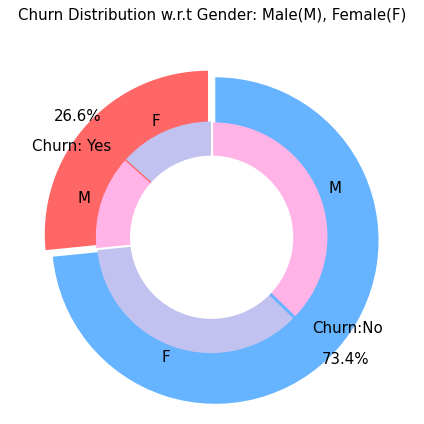

In [57]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

# Next Investigate Senior Citizen vs Gender Wise Churn Tendency

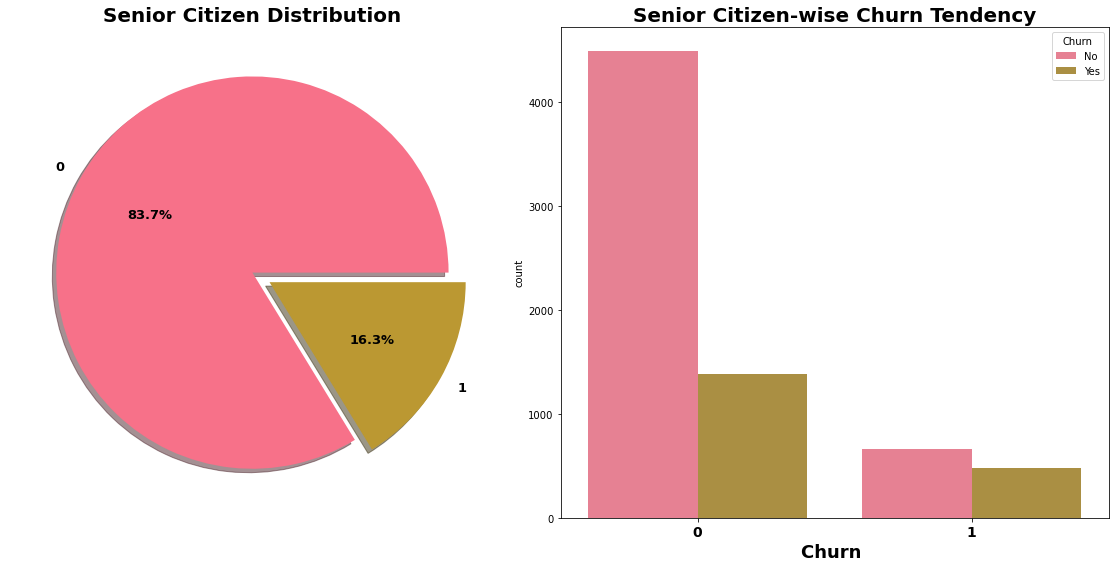

In [58]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['SeniorCitizen'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Senior Citizen Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('SeniorCitizen',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Senior Citizen-wise Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Churn ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [59]:
pd.crosstab([df.gender,df.SeniorCitizen],df["Churn"],margins=True).style.background_gradient(cmap='summer_r')

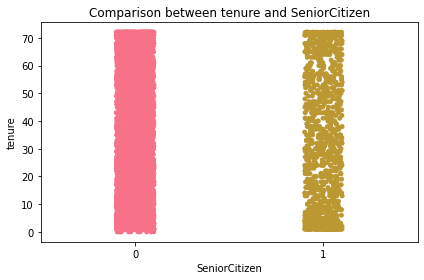

In [60]:
# Comparing tenure and SeniorCitizen
plt.title("Comparison between tenure and SeniorCitizen")
sns.stripplot(x = "SeniorCitizen",y="tenure",data = df)
plt.show()

# Effect of Partner and Dependents on Churn

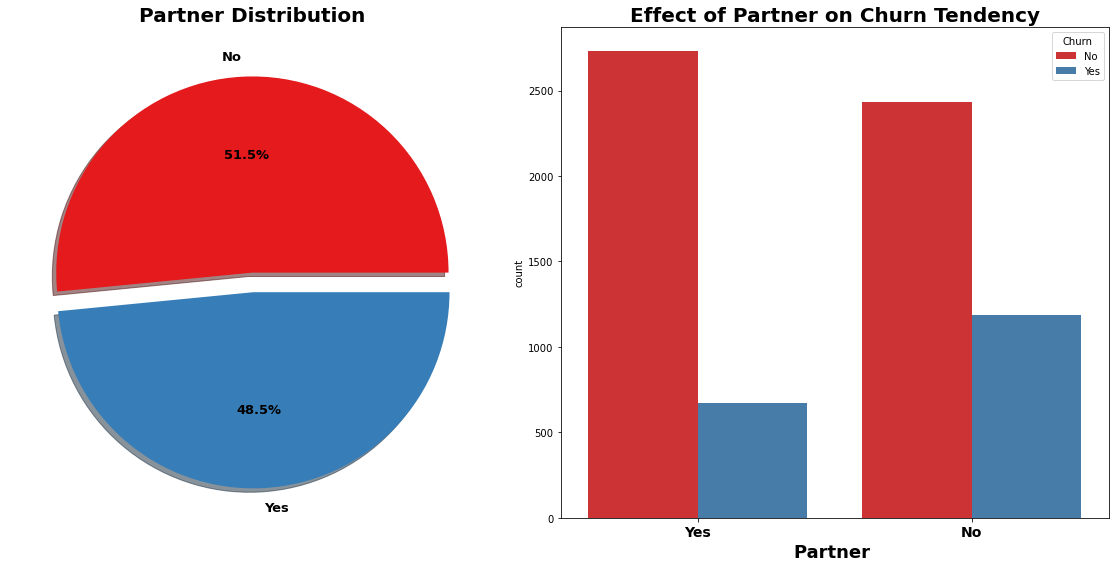

In [61]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Partner'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Partner Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Partner',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Partner on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Partner ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

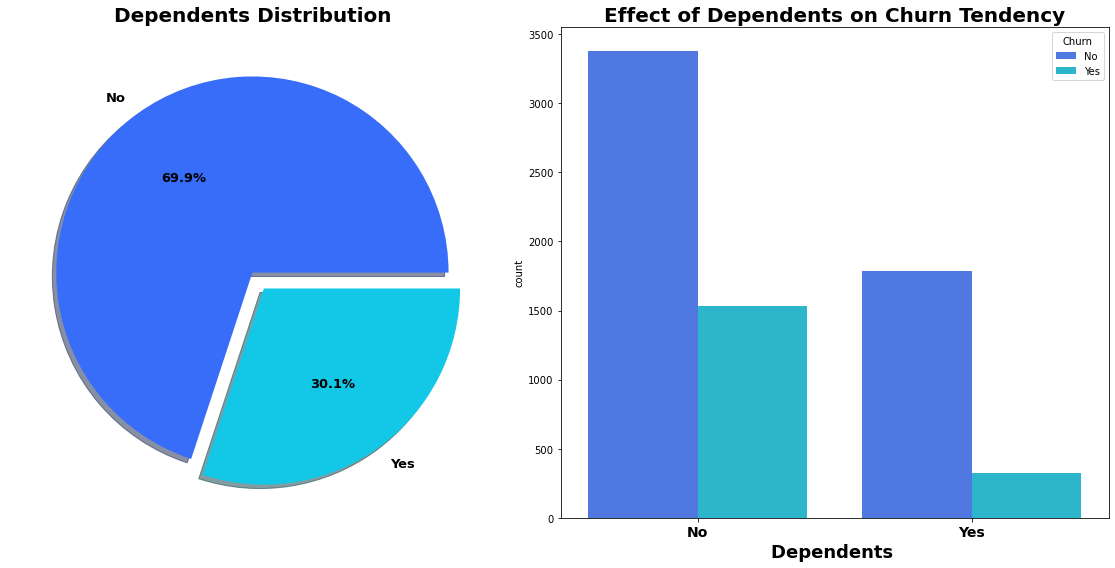

In [62]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Dependents'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Dependents Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Dependents',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Dependents on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Dependents ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

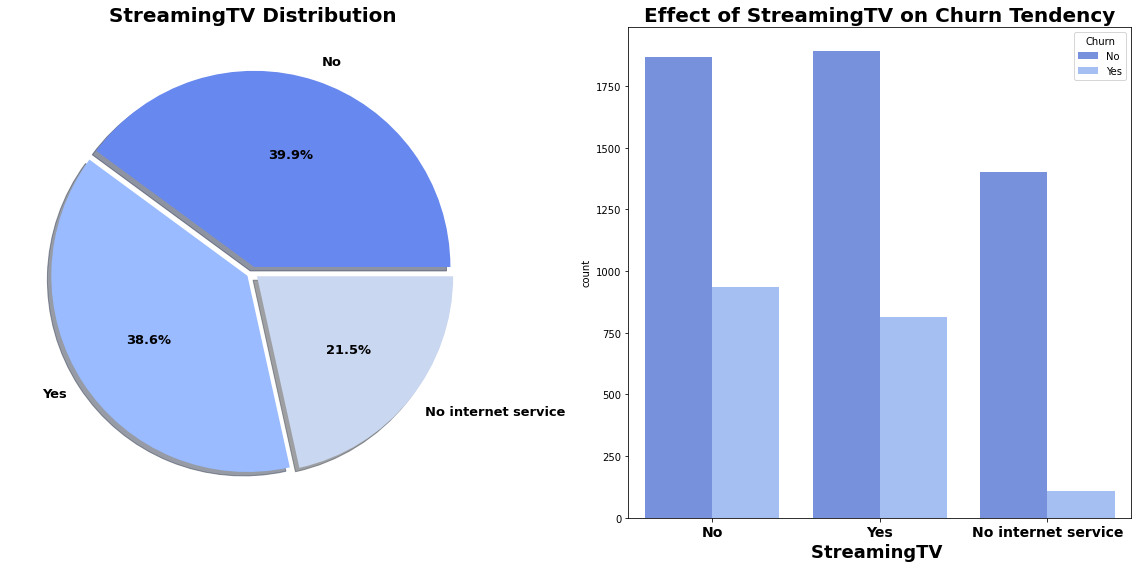

In [63]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('coolwarm')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['StreamingTV'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('StreamingTV Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('StreamingTV',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of StreamingTV on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("StreamingTV ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

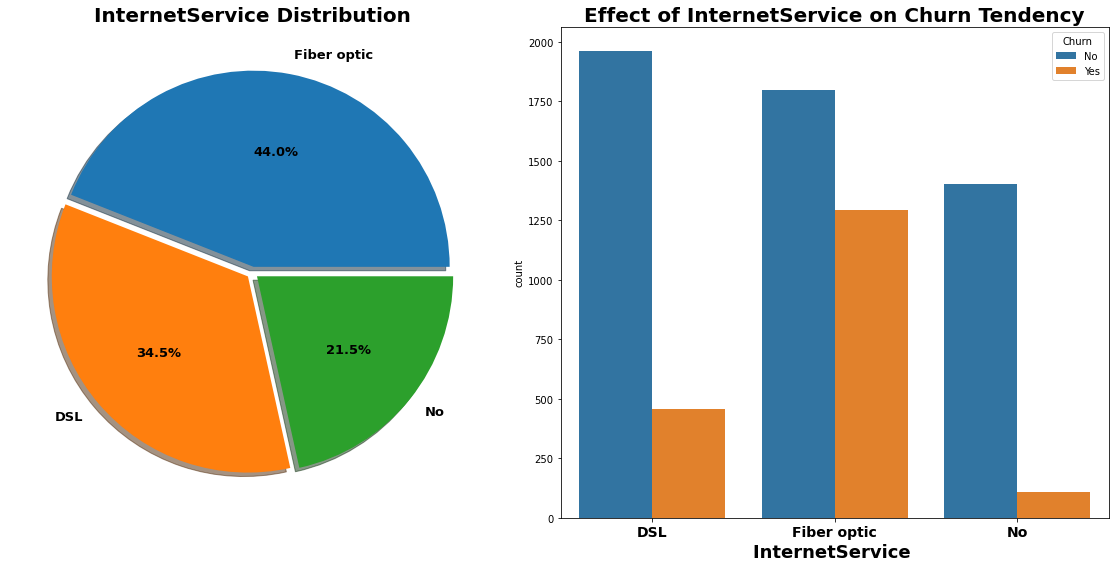

In [64]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('tab10')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['InternetService'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('InternetService Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('InternetService',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of InternetService on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("InternetService ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

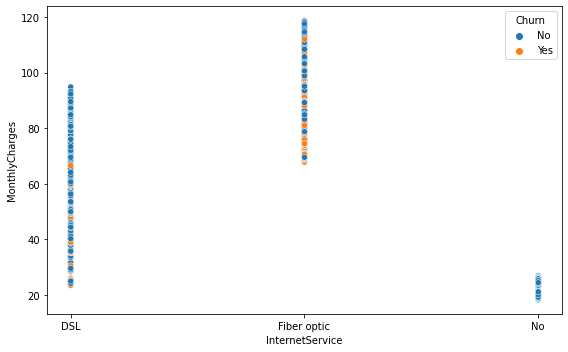

In [65]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="InternetService", y='MonthlyCharges',data=df,hue="Churn")
plt.show()

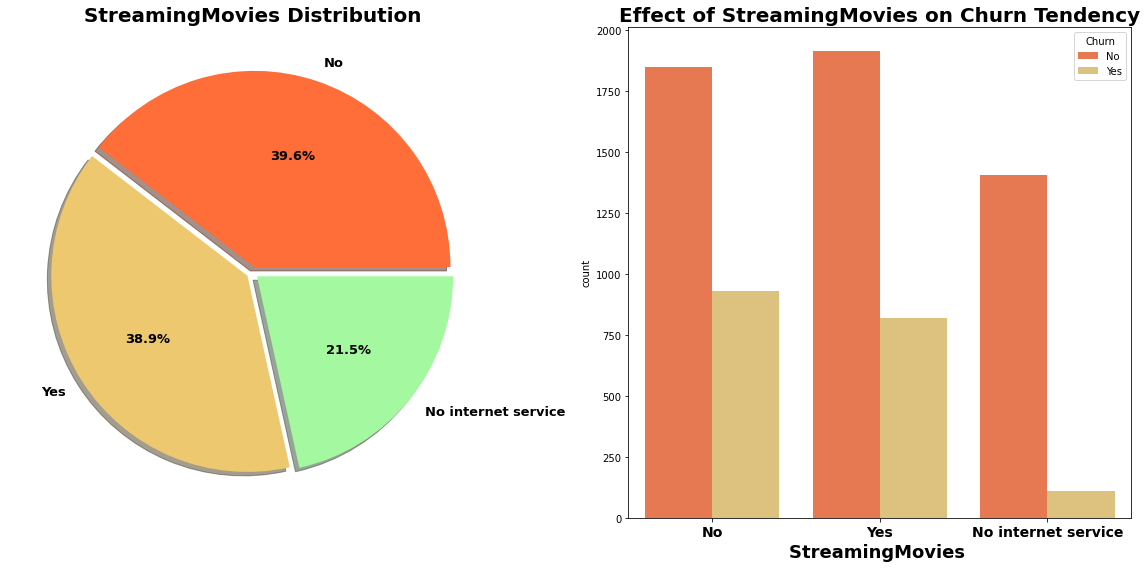

In [66]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow_r')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['StreamingMovies'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('StreamingMovies Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('StreamingMovies',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of StreamingMovies on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("StreamingMovies ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

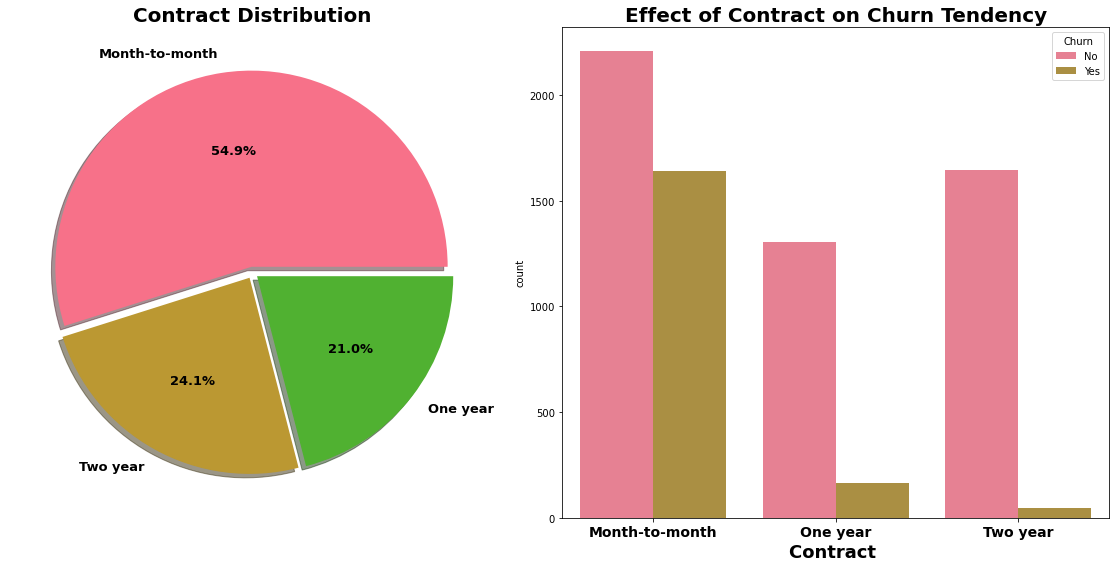

In [67]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Contract'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Contract Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Contract',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Contract on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Contract ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

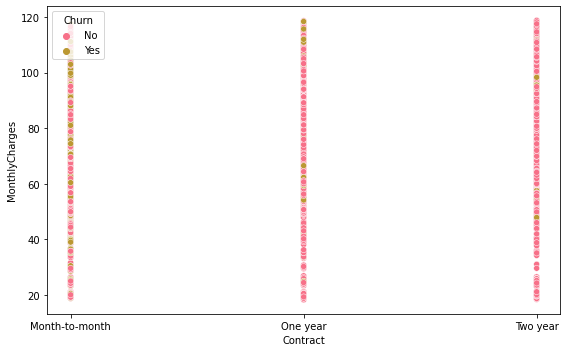

In [68]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Contract", y='MonthlyCharges',data=df,hue="Churn")
plt.show()

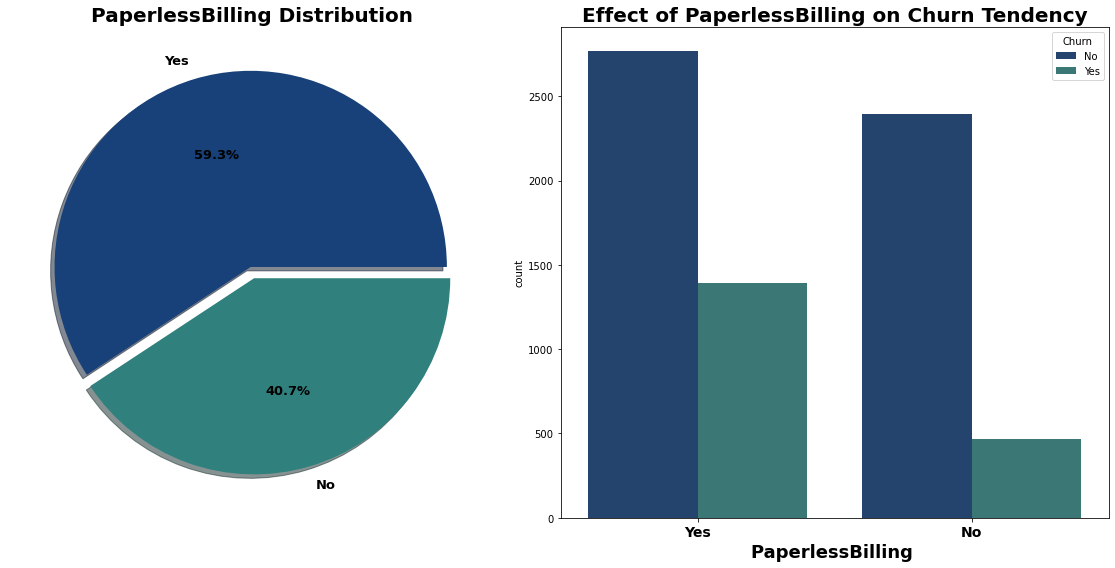

In [69]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gist_earth')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['PaperlessBilling'].value_counts().plot.pie(explode=[0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('PaperlessBilling Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('PaperlessBilling',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of PaperlessBilling on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("PaperlessBilling ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

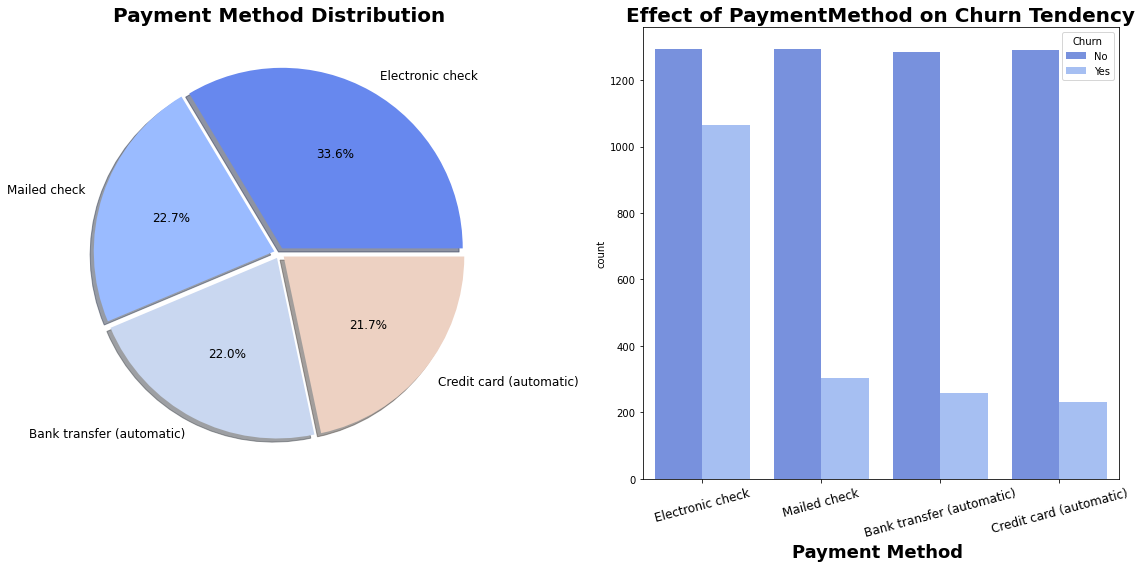

In [70]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('coolwarm')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['PaymentMethod'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontsize':12}, ax=ax[0],shadow=True)
ax[0].set_title('Payment Method Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('PaymentMethod',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of PaymentMethod on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Payment Method ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=12,rotation=15)
plt.tight_layout()
plt.show()

<b> high Attrition tendency in customer who pay by Electronic check.<b>

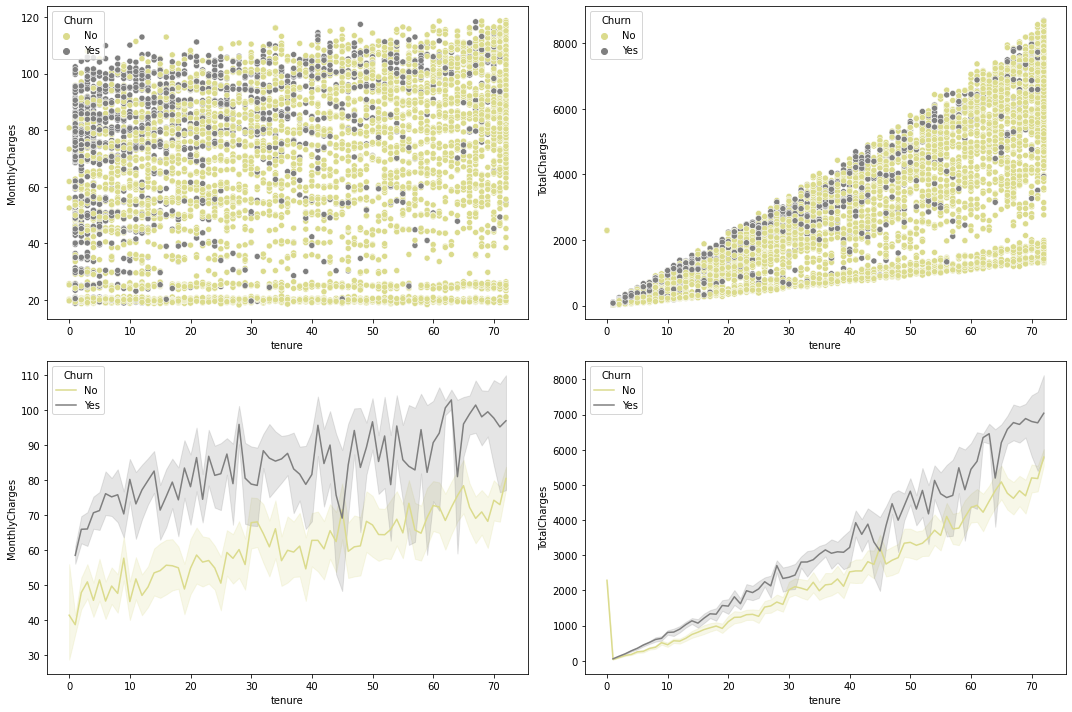

In [71]:
sns.set_palette('tab20_r')
fig , ax=plt.subplots(2,2, figsize=(15,10))
for i,col in enumerate(["MonthlyCharges","TotalCharges"]):
    sns.scatterplot(ax=ax[0,i],x="tenure", y=col,data=df,hue="Churn")
    sns.lineplot(ax=ax[1,i],x="tenure", y=col,data=df,hue="Churn")

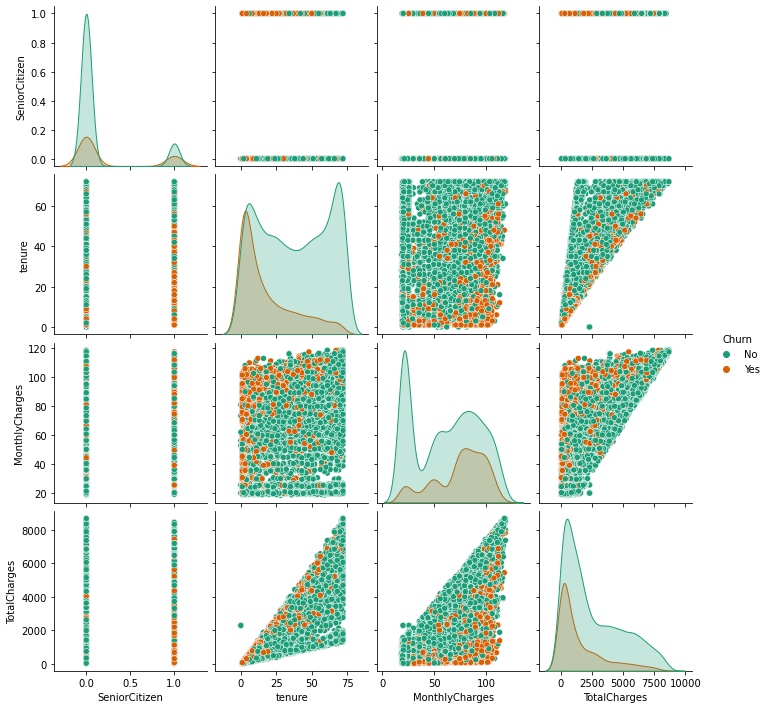

In [72]:
sns.pairplot(df,hue="Churn",palette="Dark2")
plt.show()

# Encoding categorical data

In [73]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['tenure'], float64: ['MonthlyCharges', 'TotalCharges'], object: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']}

In [74]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [75]:
Numerical =['tenure','MonthlyCharges', 'TotalCharges']

In [80]:
Category =['gender', 'Partner','PhoneService', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 
           'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn','SeniorCitizen']

In [81]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# Feature selection and Engineering

# 1. Outliers Detection and Removal

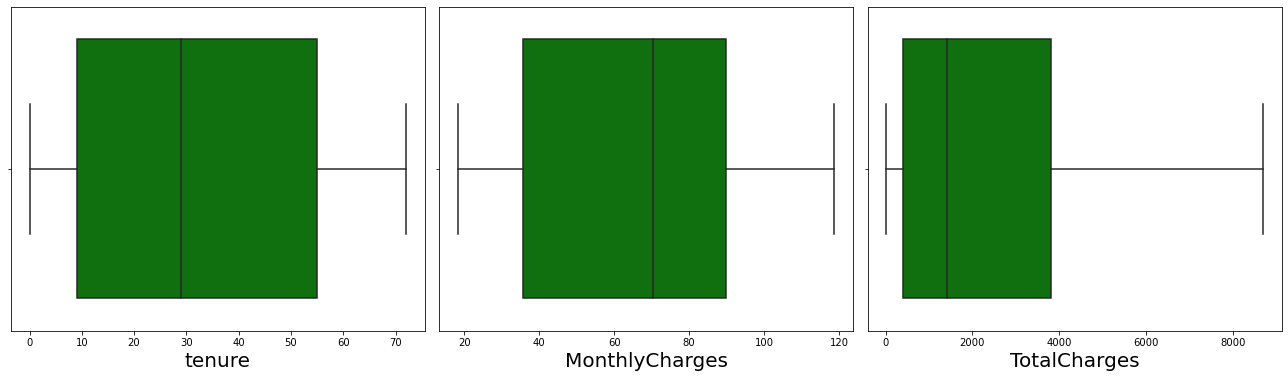

In [82]:
plt.figure(figsize=(18,10),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Outliers removal using Zscore method

In [83]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (7021, 20)
Shape of the dataframe after removing outliers:  (6339, 20)
Percentage of data loss post outlier removal:  9.713715994872524


In [84]:
df.drop(['PhoneService'],axis=1,inplace=True)

# 2. Skewness of features

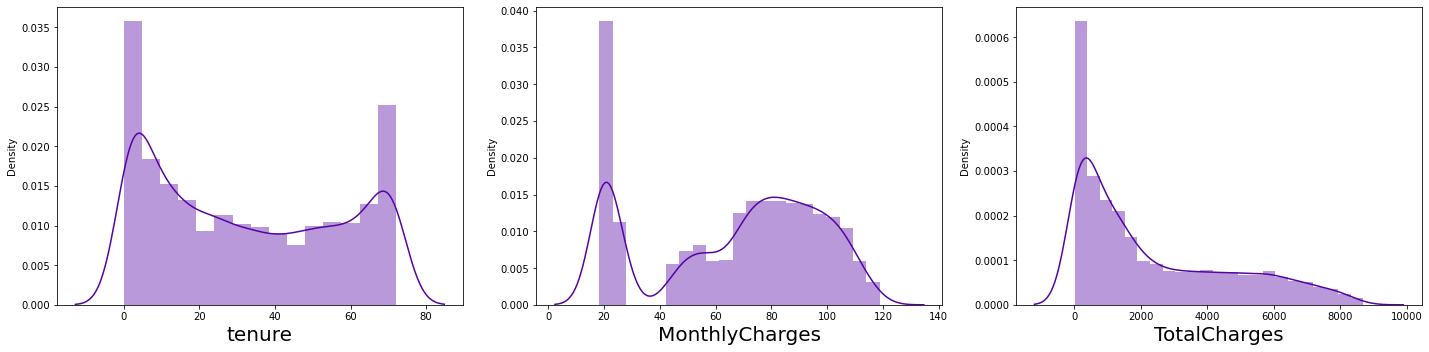

In [85]:
plt.figure(figsize=(20,5),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in Numerical:
    if plotnum<=3:
        plt.subplot(1,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [86]:
df.skew()

gender             -0.012939
SeniorCitizen       1.819335
Partner             0.049562
Dependents          0.871194
tenure              0.233517
MultipleLines       0.125532
InternetService     0.051965
OnlineSecurity      0.421216
OnlineBackup        0.166121
DeviceProtection    0.181524
TechSupport         0.408970
StreamingTV        -0.005185
StreamingMovies    -0.012505
Contract            0.624212
PaperlessBilling   -0.388673
PaymentMethod      -0.165613
MonthlyCharges     -0.404120
TotalCharges        0.895850
Churn               1.058644
dtype: float64

In [87]:
df['TotalCharges'] = np.log1p(df['TotalCharges'])

# 3. Corrleation

In [88]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.005846,-0.002207,0.015722,0.001891,-0.006391,0.000983,-0.016826,-0.009353,-0.003121,-0.009769,-0.005624,-0.002760,0.000674,-0.018131,0.021961,-0.011639,-0.006783,-0.011391
SeniorCitizen,-0.005846,1.000000,0.013943,-0.213486,0.017647,0.152954,-0.039479,-0.123668,-0.020710,-0.023590,-0.144694,0.028453,0.047062,-0.141107,0.155193,-0.041891,0.238426,0.111597,0.149599
Partner,-0.002207,0.013943,1.000000,0.453409,0.382932,0.147545,-0.004099,0.151348,0.154738,0.167390,0.132266,0.133353,0.127676,0.297393,-0.010458,-0.147854,0.088571,0.337926,-0.153262
Dependents,0.015722,-0.213486,0.453409,1.000000,0.159194,-0.028535,0.053701,0.146427,0.090389,0.082944,0.130166,0.048859,0.023932,0.242286,-0.106970,-0.037411,-0.131791,0.084275,-0.158628
tenure,0.001891,0.017647,0.382932,0.159194,1.000000,0.358098,-0.034932,0.326356,0.377187,0.367678,0.324457,0.282710,0.292966,0.674586,0.002370,-0.361878,0.242184,0.827354,-0.348882
MultipleLines,-0.006391,0.152954,0.147545,-0.028535,0.358098,1.000000,-0.107675,0.006752,0.125043,0.130055,0.011287,0.187307,0.193380,0.114261,0.174017,-0.183244,0.454819,0.458583,0.042438
InternetService,0.000983,-0.039479,-0.004099,0.053701,-0.034932,-0.107675,1.000000,-0.027406,0.030417,0.049829,-0.022841,0.099513,0.094169,0.115528,-0.164085,0.096674,-0.470605,-0.260767,-0.058968
OnlineSecurity,-0.016826,-0.123668,0.151348,0.146427,0.326356,0.006752,-0.027406,1.000000,0.198167,0.173275,0.283252,0.046717,0.062345,0.367667,-0.154346,-0.089597,-0.071808,0.207795,-0.289182
OnlineBackup,-0.009353,-0.020710,0.154738,0.090389,0.377187,0.125043,0.030417,0.198167,1.000000,0.195604,0.210090,0.151646,0.139587,0.286126,-0.019141,-0.126394,0.110079,0.310079,-0.201206
DeviceProtection,-0.003121,-0.023590,0.167390,0.082944,0.367678,0.130055,0.049829,0.173275,0.195604,1.000000,0.241956,0.278088,0.284397,0.342751,-0.040732,-0.132907,0.154859,0.318027,-0.176171


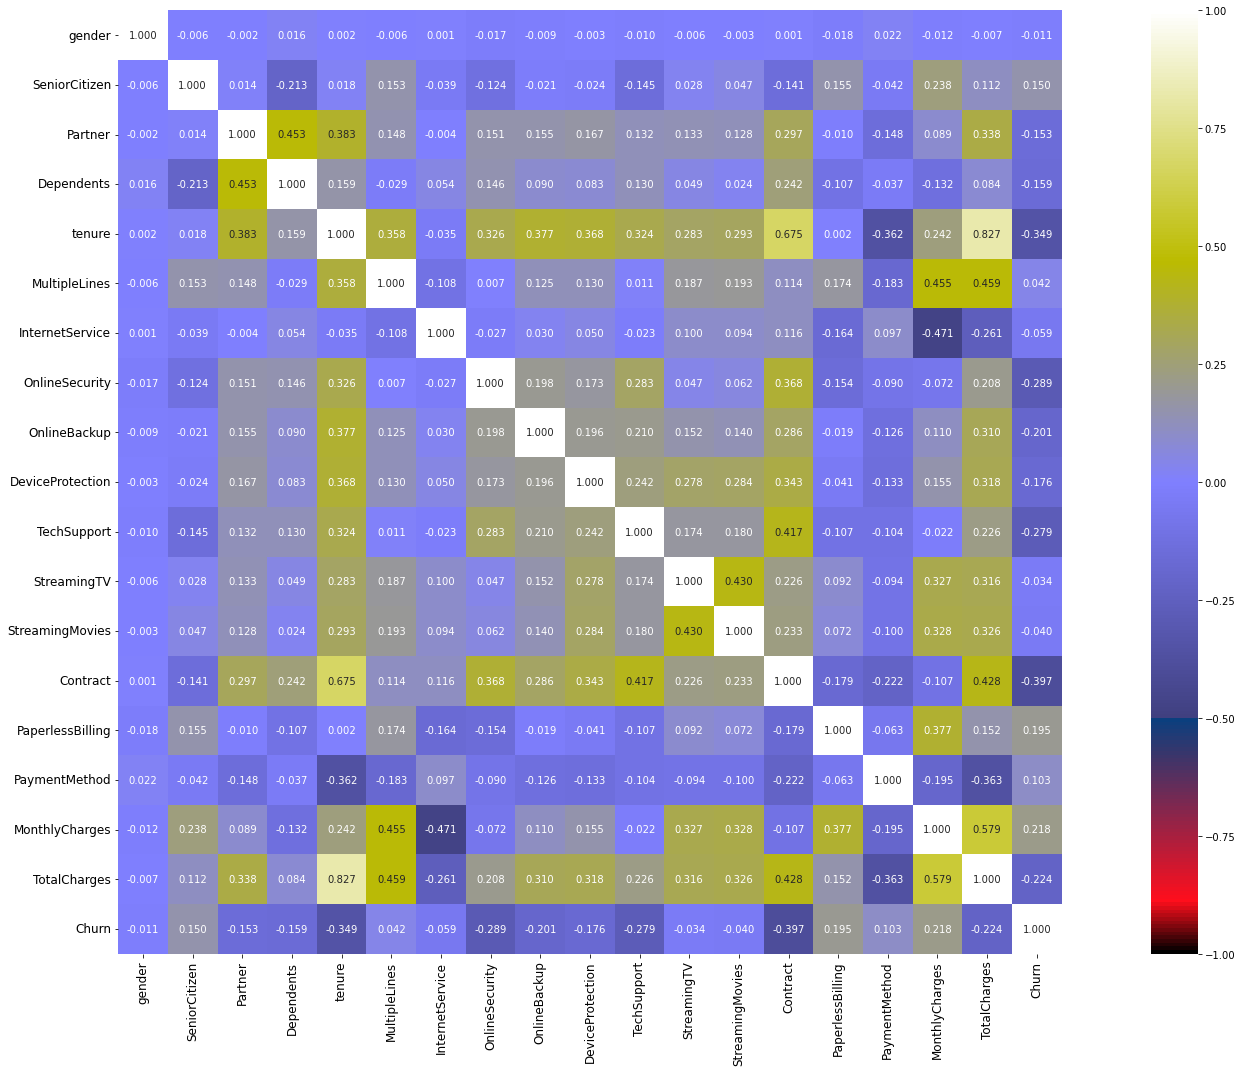

In [89]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

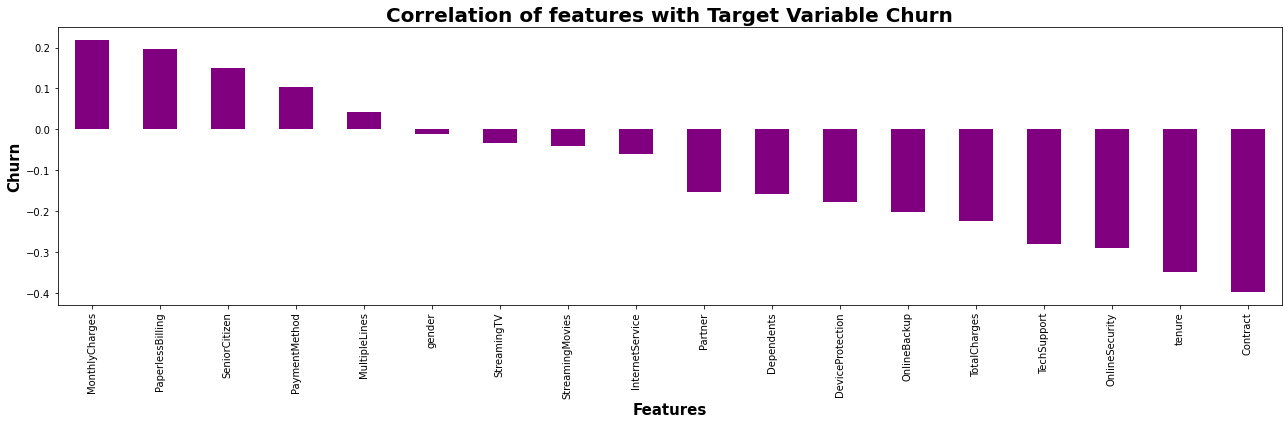

In [90]:
plt.figure(figsize = (18,6))
df.corr()['Churn'].drop(['Churn']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Churn',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Churn',fontsize = 20,fontweight='bold')
plt.show()

# 4. Balanceing Imbalanced target feature

In [91]:
from imblearn.over_sampling import SMOTE

In [92]:
# Splitting data in target and dependent feature
X = df.drop(['Churn'], axis =1)
Y = df['Churn']

In [93]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [94]:
Y.value_counts()

0    4652
1    4652
Name: Churn, dtype: int64

# Standard Scaling

In [95]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# 5. Checking Multicollinearity between features using variance_inflation_factor

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

,VIF values,Features
0,1.014008,gender
1,1.093445,SeniorCitizen
2,1.542210,Partner
3,1.429536,Dependents
4,6.518799,tenure
5,1.425544,MultipleLines
6,1.462796,InternetService
7,1.345272,OnlineSecurity
8,1.244433,OnlineBackup
9,1.317938,DeviceProtection


# PCA

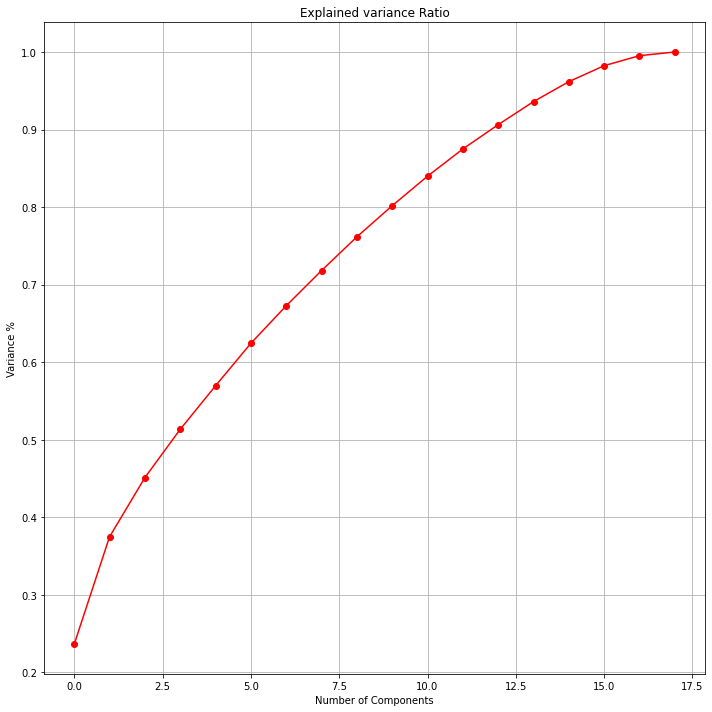

In [97]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [98]:
pca_new = PCA(n_components=13)
x_new = pca_new.fit_transform(X_scale)

In [99]:
principle_x=pd.DataFrame(x_new,columns=np.arange(13))

# Machine Learning Model Building

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (6512, 13)
Training target vector size: (6512,)
Test feature matrix size: (2792, 13)
Test target vector size: (2792,)


# Finding best Random state

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8119627507163324 on Random_state 191


In [103]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=90, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8076647564469914


Confusion matrix of Logistics Regression : 
 [[1090  325]
 [ 212 1165]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.84      0.77      0.80      1415
           1       0.78      0.85      0.81      1377

    accuracy                           0.81      2792
   macro avg       0.81      0.81      0.81      2792
weighted avg       0.81      0.81      0.81      2792



# Finding Optimal value of n_neighbors for KNN

In [104]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.47275332045976226
RMSE value for k=  2 is: 0.4905993060360915
RMSE value for k=  3 is: 0.46086066239511747
RMSE value for k=  4 is: 0.46550031623255367
RMSE value for k=  5 is: 0.4631862986725071
RMSE value for k=  6 is: 0.4585232306095254
RMSE value for k=  7 is: 0.4530223243517162
RMSE value for k=  8 is: 0.4514383253608233
RMSE value for k=  9 is: 0.4506442379819818
RMSE value for k=  10 is: 0.4494504763141606
RMSE value for k=  11 is: 0.45420669846267875
RMSE value for k=  12 is: 0.4502466691017817
RMSE value for k=  13 is: 0.4534174594676999
RMSE value for k=  14 is: 0.4502466691017817
RMSE value for k=  15 is: 0.45420669846267875
RMSE value for k=  16 is: 0.4498487488569214
RMSE value for k=  17 is: 0.45578107648827826
RMSE value for k=  18 is: 0.45460080413201925
RMSE value for k=  19 is: 0.4530223243517162
RMSE value for k=  20 is: 0.4510414564266491


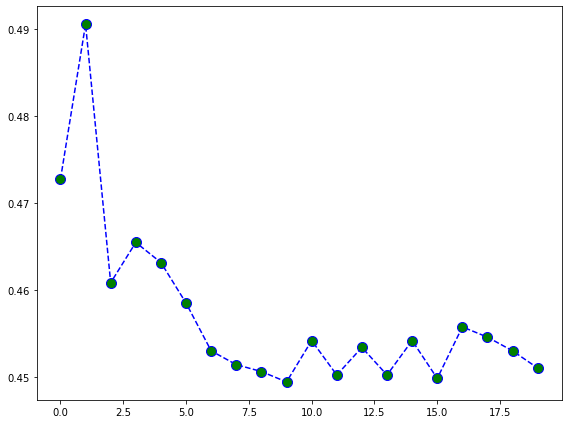

In [105]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(20), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.show()

# Applying other classification algorithm

In [106]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 18),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.8076647564469914


Confusion matrix : 
 [[1090  325]
 [ 212 1165]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.84      0.77      0.80      1415
           1       0.78      0.85      0.81      1377

    accuracy                           0.81      2792
   macro avg       0.81      0.81      0.81      2792
weighted avg       0.81      0.81      0.81      2792



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8277220630372493


Confusion matrix : 
 [[1114  301]
 [ 180 1197]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.79      0.82      1415
           1       0.80      0.87      0.83      1377

    accuracy                           0.83      2792
   macro avg       0.83      0.83      0.83      2792
weighted avg       0.83      0.83      0

# CrossValidation :

In [107]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 18),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')



Cross Validation Score LogisticRegression() :

Score : [0.75819452 0.74153681 0.7898979  0.79849543 0.80967742]
Mean Score : 0.7795604167027785
Std deviation : 0.025591907755089075




Cross Validation Score SVC() :

Score : [0.74583557 0.74422354 0.80977969 0.83127351 0.8344086 ]
Mean Score : 0.7931041814725579
Std deviation : 0.04016133512230953




Cross Validation Score GaussianNB() :

Score : [0.7130575  0.72058033 0.80118216 0.80924234 0.81290323]
Mean Score : 0.7713931115771957
Std deviation : 0.044783978837186295




Cross Validation Score DecisionTreeClassifier() :

Score : [0.69801182 0.72272972 0.7898979  0.78882321 0.79354839]
Mean Score : 0.7586022083167218
Std deviation : 0.04017958653274958




Cross Validation Score KNeighborsClassifier(n_neighbors=18) :

Score : [0.75174637 0.74476088 0.80171951 0.8027942  0.81827957]
Mean Score : 0.7838601052734974
Std deviation : 0.029739531497497355




Cross Validation Score RandomForestClassifier() :

Score : [0.72434175 0.75013

# Hyper Parameter Tuning : GridSearchCV

In [108]:
from sklearn.model_selection import GridSearchCV

In [109]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [110]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.777 total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.791 total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.780 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.793 total time=   0.0s
[CV 5

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [111]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'auto',
 'n_estimators': 70}

# Final Model

In [112]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 60, max_depth=40 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8549426934097422


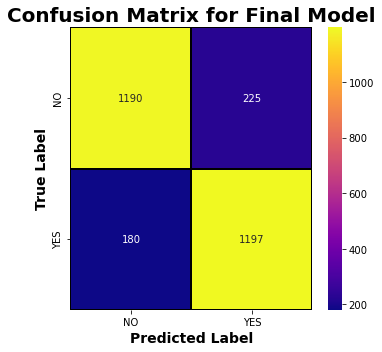

In [113]:
# Lets plot confusion matrix for  FinalModel
Matrix = confusion_matrix(Y_test, y_pred)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="plasma", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()

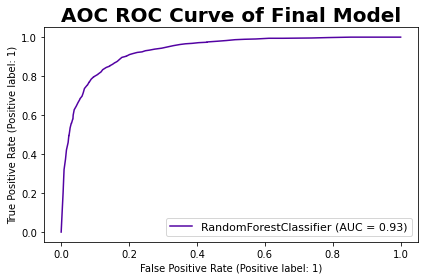

Auc Score :
 0.8551352225224601


In [114]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(Final_mod,X_test,Y_test)   
plt.legend(prop={'size':11}, loc='lower right')
plt.title('AOC ROC Curve of Final Model',fontsize=20,fontweight='bold')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

# Saving model

In [115]:
import joblib
joblib.dump(Final_mod,'Customer_Churn_Final.obj')

['Customer_Churn_Final.obj']